<a href="https://colab.research.google.com/github/platypus2000jp/Colaboratory/blob/main/PID%E5%88%B6%E5%BE%A1%E3%81%AE%E4%BE%8B%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24481 (\N{CJK UNIFIED IDEOGRAPH-5FA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

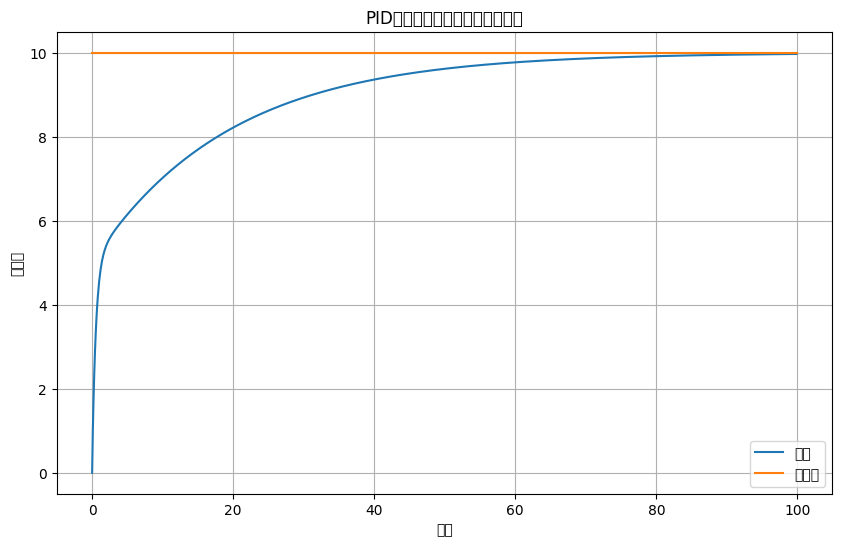

In [1]:
# prompt: PID制御の例題を見せてください。

import numpy as np
import matplotlib.pyplot as plt

# PID制御のパラメータ
Kp = 1.0  # 比例ゲイン
Ki = 0.1  # 積分ゲイン
Kd = 0.01 # 微分ゲイン

# 制御対象のモデル（一次遅れ系）
def plant(u, prev_y):
  tau = 1.0  # 時定数
  K = 1.0   # ゲイン
  dt = 0.1   # サンプリング時間
  y = (K * prev_y + K * u * dt / tau) / (1 + dt / tau)
  return y

# 目標値
setpoint = 10.0

# シミュレーション時間
simulation_time = 100
dt = 0.1
time = np.arange(0, simulation_time, dt)
y = np.zeros(len(time))
u = np.zeros(len(time))
error = np.zeros(len(time))
integral_error = 0.0
prev_error = 0.0

# PID制御の実行
for i in range(1, len(time)):
  error[i] = setpoint - y[i-1]
  integral_error += error[i] * dt
  derivative_error = (error[i] - prev_error) / dt
  u[i] = Kp * error[i] + Ki * integral_error + Kd * derivative_error
  y[i] = plant(u[i], y[i-1])
  prev_error = error[i]

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(time, y, label="出力")
plt.plot(time, np.full(len(time), setpoint), label="目標値")
plt.xlabel("時間")
plt.ylabel("出力値")
plt.title("PID制御のシミュレーション結果")
plt.legend()
plt.grid(True)
plt.show()
